# SIR modely

## SIR

Beta 0.5
Gamma 0.5
Final values:
S = 26236.72990977599
I = 0.0005169572040112455
R = 973763.2695732669
True 0


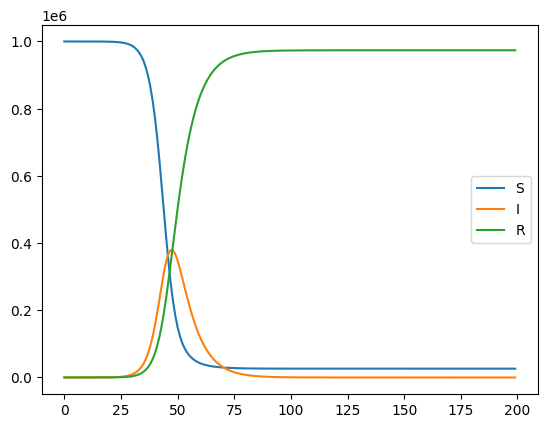

In [208]:
import numpy as np
import matplotlib.pyplot as plt

#T - čas, N - populace
def getSIR(T, N, beta, gamma):
    S = np.zeros(T)
    I = np.zeros(T)
    R = np.zeros(T)

    # init
    S[0] = N - 1 # odečtu infikovaného
    I[0] = 1 # musím mít jednoho infikovaného
    R[0] = 0

    # vypočtu hodnoty v jednotlivých časových bodech
    for t in range(T-1):
        #vypočítám změny v časovém horizontu
        dS = -beta * S[t] * I[t] / N
        dI = beta * S[t] * I[t] / N - gamma * I[t]
        dR = gamma * I[t]

        #připočtu deltu
        S[t+1] = S[t] + dS
        I[t+1] = I[t] + dI
        R[t+1] = R[t] + dR

    return S, I, R


D = 7 #7dní infikační doba - covid
R_0 = 3.5 #
beta = R_0 * 1/D
print("Beta", beta)
gamma = 1/D
print("Gamma", beta)

S, I, R = getSIR(200, int(1e6), beta=beta, gamma=gamma)

print("Final values:")
print("S =", S[-1])
print("I =", I[-1])
print("R =", R[-1])

#simple check
print(int(1e6) == round(S[-1]+I[-1]+R[-1]),0)

plt.plot(S, label='S')
plt.plot(I, label='I')
plt.plot(R, label='R')
plt.legend()
plt.show()

## SIS

Beta 0.5
Gamma 0.5
Final values:
S = 285714.2857142858
I = 714285.7142857143
True


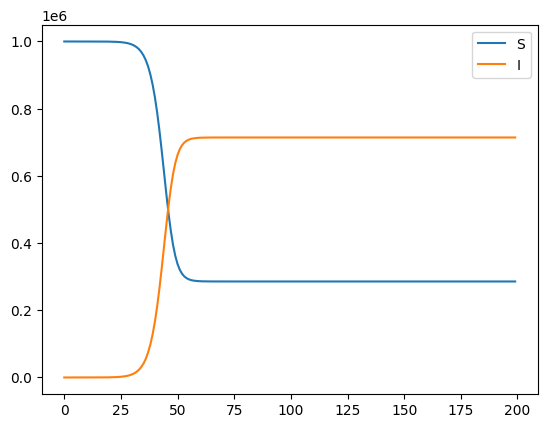

In [209]:
import numpy as np
import matplotlib.pyplot as plt

#T - čas, N - populace
def getSIS(T, N, beta, gamma):
    S = np.zeros(T)
    I = np.zeros(T)

    # init
    S[0] = N - 1 # odečtu infikovaného
    I[0] = 1 # musím mít jednoho infikovaného

    # vypočtu hodnoty v jednotlivých časových bodech
    for t in range(T-1):
        #vypočítám změny v časovém horizontu
        dS = -((beta * S[t] *I[t] )/ N) + gamma*I[t]
        dI = ((beta * S[t] * I[t]) / N) - gamma*I[t]

        #připočtu deltu
        S[t+1] = S[t] + dS
        I[t+1] = I[t] + dI

    return S, I


D = 7 #7dní infikační doba - covid
R_0 = 3.5 #
beta = R_0 * 1/D
print("Beta", beta)
gamma = 1/D
print("Gamma", beta)

S, I = getSIS(200, int(1e6), beta=beta, gamma=gamma)

print("Final values:")
print("S =", S[-1])
print("I =", I[-1])

#simple check
print(int(1e6) == round(S[-1]+I[-1],0))

plt.plot(S, label='S')
plt.plot(I, label='I')
plt.legend()
plt.show()

## SIRD

Beta 0.5
Gamma 0.5
Death rate 0.03
Final values:
S = 56222.73207473867
I = 5.3810731620067265e-05
R = 779981.2131169019
D = 163796.05475454923
True 0
1000000.0


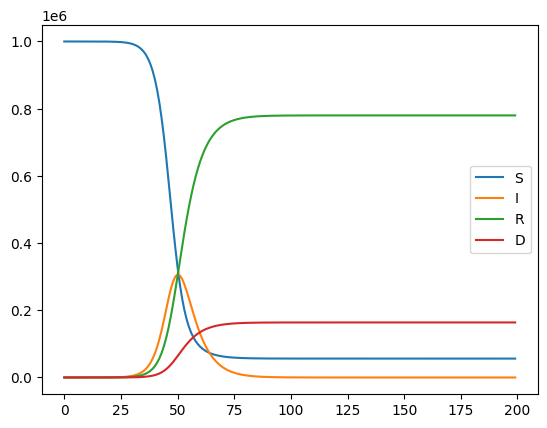

In [210]:
import numpy as np
import matplotlib.pyplot as plt

#T - čas, N - populace
def getSIRD(T, N, beta, gamma, death_rate):
    S = np.zeros(T)
    I = np.zeros(T)
    R = np.zeros(T)
    D = np.zeros(T)

    # init
    S[0] = N - 1 # odečtu infikovaného
    I[0] = 1 # musím mít jednoho infikovaného
    R[0] = 0 # počet vyléčených pokud přežili
    D[0] = 0 # počet mrtvých

    # vypočtu hodnoty v jednotlivých časových bodech
    for t in range(T-1):
        #vypočítám změny v časovém horizontu
        dS = -beta * S[t] * I[t] / N
        dI = ((beta * S[t] * I[t]) / N) - gamma * I[t] - death_rate * I[t]
        dR = gamma * I[t]
        dD = death_rate * I[t]

        #připočtu deltu
        S[t+1] = S[t] + dS
        I[t+1] = I[t] + dI
        R[t+1] = R[t] + dR
        D[t+1] = D[t] + dD

    return S, I, R, D


D = 7 #7dní infikační doba - covid
R_0 = 3.5 #
beta = R_0 * 1/D
print("Beta", beta)
gamma = 1/D
print("Gamma", beta)
death_rate = 0.03
print("Death rate", death_rate)

S, I, R, D = getSIRD(200, int(1e6), beta=beta, gamma=gamma, death_rate=death_rate)

print("Final values:")
print("S =", S[-1])
print("I =", I[-1])
print("R =", R[-1])
print("D =", D[-1])


#simple check
print(int(1e6) == round(S[-1]+I[-1]+R[-1]+D[-1]),0)
print(round((S[-1]+I[-1]+R[-1]+D[-1]),0))

plt.plot(S, label='S')
plt.plot(I, label='I')
plt.plot(R, label='R')
plt.plot(D, label='D')
plt.legend()
plt.show()

## SIRVD

Beta 0.5
Gamma 0.5
Death rate 0.03
Vaccination rate 0.0005
Final values:
S = 55738.06671367063
I = 6.573625418771612e-05
R = 757071.8652953703
V = 28204.976213195856
D = 158985.0917120276
True 0
1000000.0


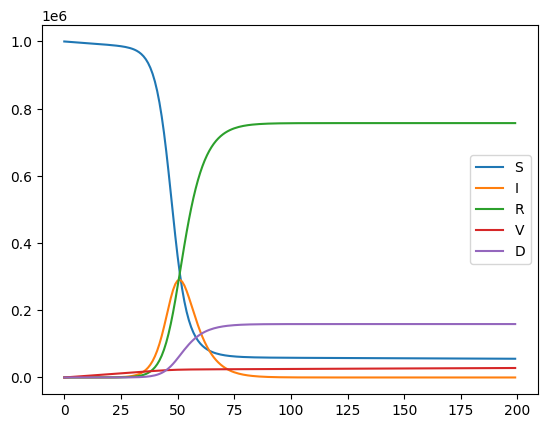

In [211]:
import numpy as np
import matplotlib.pyplot as plt

#T - čas, N - populace
def getSIRVD(T, N, beta, gamma, death_rate, vacc_rate):
    S = np.zeros(T)
    I = np.zeros(T)
    R = np.zeros(T)
    V = np.zeros(T)
    D = np.zeros(T)

    # init
    S[0] = N - 1 # odečtu infikovaného
    I[0] = 1 # musím mít jednoho infikovaného
    V[0] = 0 # počet vakcinovaných
    R[0] = 0 # počet vyléčených pokud přežili
    D[0] = 0 # počet mrtvých

    # vypočtu hodnoty v jednotlivých časových bodech
    for t in range(T-1):
        #vypočítám změny v časovém horizontu
        dS = -((beta * S[t] * I[t]) / N) - vacc_rate * S[t]
        dI = ((beta * S[t] * I[t]) / N) - gamma * I[t] - death_rate * I[t]
        dV = vacc_rate * S[t]
        dR = gamma * I[t]
        dD = death_rate * I[t]

        #připočtu deltu
        S[t+1] = S[t] + dS
        I[t+1] = I[t] + dI
        R[t+1] = R[t] + dR
        V[t+1] = V[t] + dV
        D[t+1] = D[t] + dD

    return S, I, R, V, D


D = 7 #7dní infikační doba - covid
R_0 = 3.5 #
beta = R_0 * 1/D
print("Beta", beta)
gamma = 1/D
print("Gamma", beta)
death_rate = 0.03
print("Death rate", death_rate)
vacc_rate = 0.0005
print("Vaccination rate", vacc_rate)

S, I, R, V, D = getSIRVD(200, int(1e6), beta=beta, gamma=gamma, death_rate=death_rate, vacc_rate=vacc_rate)

print("Final values:")
print("S =", S[-1])
print("I =", I[-1])
print("R =", R[-1])
print("V =", V[-1])
print("D =", D[-1])


#simple check
print(int(1e6) == round(S[-1]+I[-1]+R[-1]+V[-1]+D[-1]),0)
print(round((S[-1]+I[-1]+R[-1]+V[-1]+D[-1]),0))

plt.plot(S, label='S')
plt.plot(I, label='I')
plt.plot(R, label='R')
plt.plot(V, label='V')
plt.plot(D, label='D')
plt.legend()
plt.show()

# Lotka–Volterra - ekologický model

Kroky 1001
A 8.117781108984307e-17
B 7.88484090425396e-08
Pred 61.788882428886396


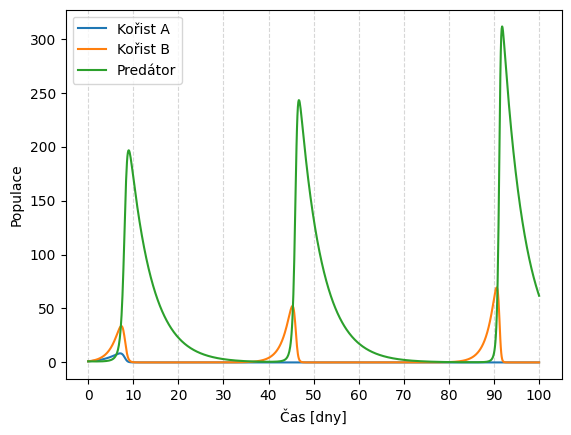

In [212]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

T = 100
#kořist 1 - X1
alfa1 = 0.35
beta1 = 0.015

#kořist 2 - X2
alfa2 = 0.55
beta2 = 0.015

#predátor
delta1 = 0.05
delta2 = 0.05
gamma = 0.2
dt = 0.1 #krok - 2.4 hodin

n_steps = int(T/dt) + 1
print("Kroky", n_steps)

# časová linie, empty arraye
t = np.linspace(0, T, n_steps)   # čas v dnech
X1 = np.zeros(n_steps)
X2 = np.zeros(n_steps)
Y = np.zeros(n_steps)

#init počty
X1[0] = 1
X2[0] = 1
Y[0] = 1

for i in range(n_steps-1):
    dX1 = alfa1 * X1[i] - beta1 * X1[i] * Y[i] #kořist 1
    dX2 = alfa2 * X2[i] - beta2 * X2[i] * Y[i] #kořist 2
    dY = (delta1 * X1[i] + delta2 * X2[i]) * Y[i] - gamma * Y[i] #kořist 2

    X1[i+1] = X1[i] + dX1 * dt # BACHA NA KONSTANTU!
    X2[i+1] = X2[i] + dX2 * dt # BACHA NA KONSTANTU!
    Y[i+1] = Y[i] + dY * dt # BACHA NA KONSTANTU!


print("A", X1[-1])
print("B", X2[-1])
print("Pred", Y[-1])

# graf – osa x = čas ve dnech
plt.plot(t, X1, label="Kořist A")
plt.plot(t, X2, label="Kořist B")
plt.plot(t, Y, label="Predátor")
plt.xlabel("Čas [dny]")
plt.ylabel("Populace")
plt.legend()
plt.xticks(np.arange(0, T+1, 10))
plt.grid(True, axis='x', linestyle="--", alpha=0.5)

plt.show()

# Interpolace a aproximace

X: [ 0.   2.5  5.   7.5 10. ]
Y: [  6.     45.375 116.    124.125 -24.   ]


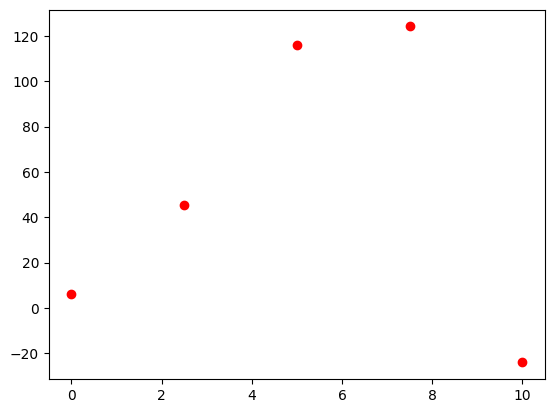

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

def f(x):
    return -x**3 + 10*x**2 - 3*x + 6

xstart = 0 #start
xend = 10 #konec
nx = 5 #počet bodů
dx = (xend - xstart)/nx
x = np.linspace(xstart, xend, nx) #x0 -> xn
print("X:", x)
fx = f(x) #y
print("Y:", fx)
plt.plot(x, fx, "ro")

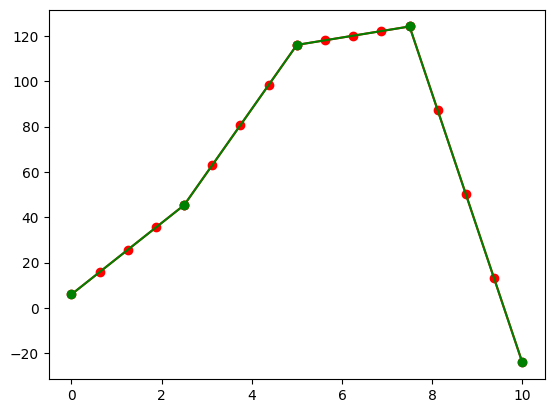

In [214]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la


def linear(x, a, b):
    return f(a) + (f(b)-f(a))/(b-a)*(x-a)

def linear_interpolation(x, fx, n_inter):
  gy = []
  gx = []
  for i in range(len(x)-1):
    x_window = np.linspace(x[i], x[i+1], n_inter)
    g = linear(x_window, x[i], x[i+1])
    gy.extend(g) #přidám do pole
    gx.extend(x_window) #přidám do pole
  return gx, gy

x_lin, y_lin = linear_interpolation(x, fx, 5)

plt.plot(x_lin, y_lin, "r-o")
plt.plot(x,fx, "go-")
plt.show()

## Vandermondova matice

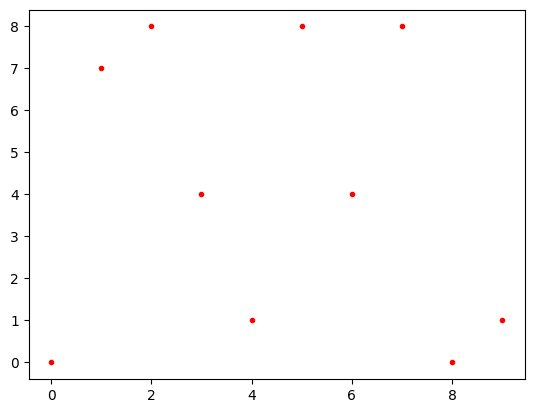

In [215]:
N = 10
x = np.arange(0,N)
y = np.random.randint(0,10,N)
plt.plot(x,y,'r.')
plt.show()

[[  1   0   0   0   0]
 [  1   1   1   1   1]
 [  1   2   4   8  16]
 [  1   3   9  27  81]
 [  1   4  16  64 256]]
[ 0.00000000e+00  1.86353968e+02 -4.69854563e+02  4.84856768e+02
 -2.63032986e+02  8.25686343e+01 -1.55090278e+01  1.71802249e+00
 -1.03422619e-01  2.60692240e-03]
200 200


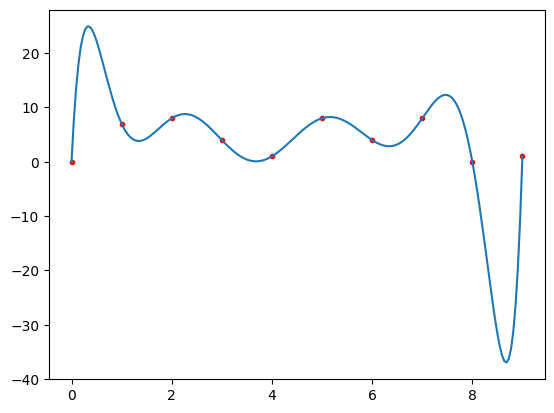

In [216]:
# Vytvoření vandermondovy matice

X = np.vander(x,increasing=True)
print(X[:5,:5])

a = la.solve(X,y) # koeficienty
print(a)

x_in = np.linspace(0,N-1,200)

for k in range(0,N):
    y_in = sum(a[k] * x_in**k for k in range(N))

print(len(x_in), len(y_in))

plt.plot(x, y, 'r.', x_in, y_in)
plt.show()


## Lagrangova interpolace

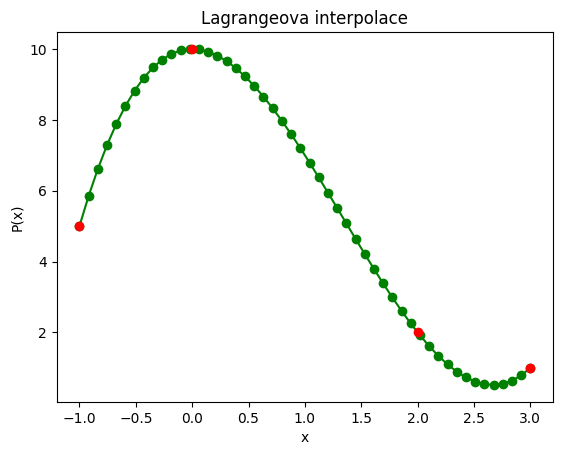

In [217]:
import numpy as np
import matplotlib.pyplot as plt

# Uzly a hodnoty
xs = [-1.0, 0.0, 2.0, 3.0]
ys = [ 5.0, 10.0, 2.0, 1.0]

def lagrange_eval(x_eval, xs, ys):
    """Vrátí hodnotu Lagrangeova interpolačního polynomu v bodě x_eval."""
    n = len(xs)
    Ln = 0.0
    for i in range(n):
        Li = 1.0 #init hodnota pro násobení
        for j in range(n):
            if i != j:
                Li *= (x_eval - xs[j]) / (xs[i] - xs[j])
            else:
                Li *= 1
        Ln += ys[i] * Li
    return Ln


x_plot = np.linspace(min(xs), max(xs), 50)
y_plot = []

for xc in x_plot:
    temp = lagrange_eval(xc, xs, ys)
    y_plot.append(temp)


# Vykreslení
plt.plot(x_plot, y_plot, "go-")
plt.plot(xs, ys, "ro")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.title("Lagrangeova interpolace")
plt.show()

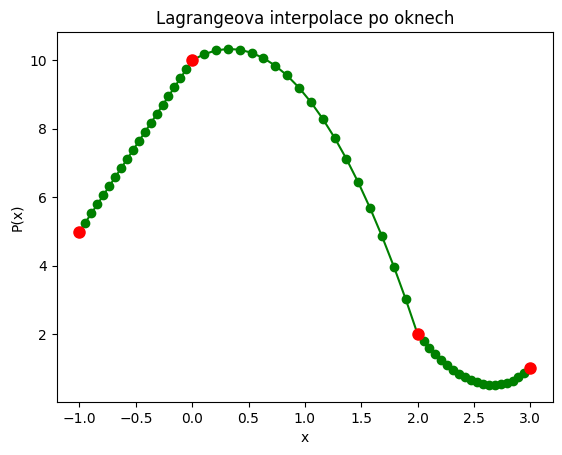

In [218]:
import numpy as np
import matplotlib.pyplot as plt

# Uzly a hodnoty
xs = [-1.0, 0.0, 2.0, 3.0]
ys = [ 5.0, 10.0, 2.0, 1.0]

def lagrange_eval(x_eval, xs, ys):
    """Vrátí hodnotu Lagrangeova interpolačního polynomu v bodě x_eval."""
    n = len(xs)
    Ln = 0.0
    for i in range(n):
        Li = 1.0 #init hodnota pro násobení
        for j in range(n):
            if i != j:
                Li *= (x_eval - xs[j]) / (xs[i] - xs[j])
            else:
                Li *= 1
        Ln += ys[i] * Li
    return Ln

n_interpolate = 20
x_phi = []
y_phi = []

for i in range(len(xs)-1):
    window = np.linspace(xs[i], xs[i+1], n_interpolate)

    #extrahuji hodnoty do funkce - moje seznamy ze vstupních dat
    x_used = xs[:i+2]
    y_used = ys[:i+2]

    for p in window:
        temp = lagrange_eval(p, x_used, y_used)
        x_phi.append(p)
        y_phi.append(temp)

# Vykreslení
plt.plot(x_phi, y_phi, "go-")
plt.plot(xs, ys, "ro", markersize=8)
plt.xlabel("x")
plt.ylabel("P(x)")
plt.title("Lagrangeova interpolace po oknech")
plt.show()

## Newtonova interpolace - Newtonovo polynom

[[ 0.5    0.     0.     0.     0.     0.     0.     0.   ]
 [ 3.134  0.     0.     0.     0.     0.     0.     0.   ]
 [ 5.9    0.     0.     0.     0.     0.     0.     0.   ]
 [ 9.9    0.     0.     0.     0.     0.     0.     0.   ]
 [10.2    0.     0.     0.     0.     0.     0.     0.   ]
 [ 9.35   0.     0.     0.     0.     0.     0.     0.   ]
 [ 7.2    0.     0.     0.     0.     0.     0.     0.   ]
 [ 6.2    0.     0.     0.     0.     0.     0.     0.   ]]
[[ 5.00000000e-01  2.63400000e+00  6.60000000e-02 -7.75815296e-02
   9.23263807e-03 -8.30697249e-04  5.70624774e-05 -3.14271851e-06]
 [ 3.13400000e+00  2.76600000e+00 -3.60698413e-01  2.39774892e-02
  -1.56642617e-03  8.23023890e-05  4.93544219e-07  0.00000000e+00]
 [ 5.90000000e+00  1.14285714e+00 -1.20923521e-01  5.18037518e-03
  -3.31890332e-04  9.06926407e-05  0.00000000e+00  0.00000000e+00]
 [ 9.90000000e+00  5.45454545e-02 -6.39393939e-02  5.33910534e-04
   1.11919192e-03  0.00000000e+00  0.00000000e+00  0.00000000e

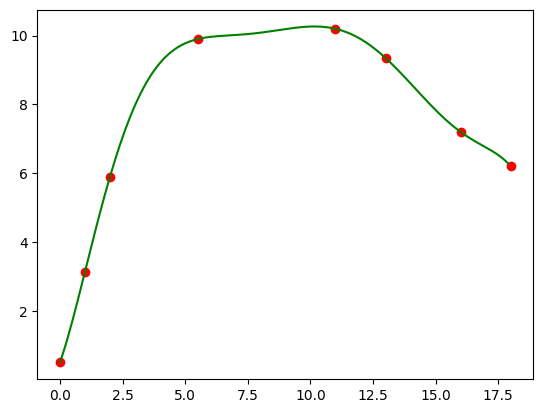

In [219]:
# dej mi poměrné diference
def divided_diff(x,y):
    n = len(y)
    coef = np.zeros([n,n])
    coef[:,0] = y #první sloupec y
    print(coef)
    for j in range(1,n): #od prvního sloupce do n
        for i in range(n-j): # jdu od 1. sloupce na 1. řádku do sloupce - i
            # pomněrná dif 1. řádu
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
    print(coef)
    return coef

# tohle je hodně wild
def newton_poly(coef, x_data, x):
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x-x_data[n-k])*p
    return p

x = np.array([0, 1, 2, 5.5, 11, 13, 16, 18])
y =  np.array([0.5, 3.134, 5.9, 9.9, 10.2, 9.35, 7.2, 6.2])

a_s = divided_diff(x, y)[0, :]

x_new = np.arange(x[0], x[-1], 0.1)
y_new = newton_poly(a_s, x, x_new)

plt.plot(x, y, 'ro')
plt.plot(x_new, y_new, 'g-')

# Aproximace - MNČ -> lineární regrese

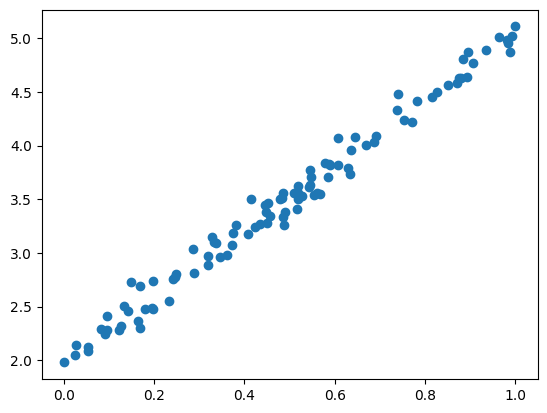

In [220]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

a0 = 2
a1 = 3
N = 100
x = np.random.rand(100) #vstupní data
noise = 0.1*np.random.randn(100)
y = a0 + a1*x + noise #vstupní data
plt.scatter(x,y)

(100, 2)
[[1.         0.38211605]
 [1.         0.05445507]
 [1.         0.44691672]
 [1.         0.02549047]
 [1.         0.08198441]]
[1.99363068 3.04287429]
[1.99363068 2.33172782 2.66982496 3.00792211 3.34601925 3.6841164
 4.02221354 4.36031068 4.69840783 5.03650497]


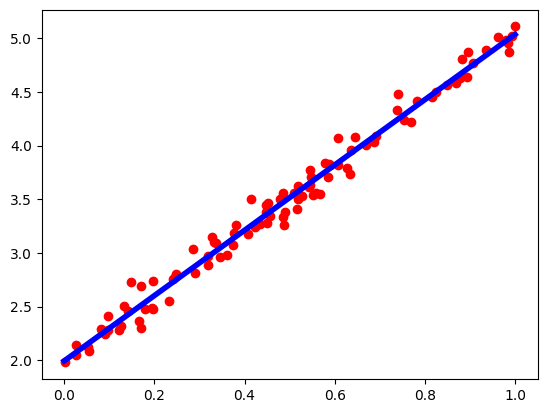

In [221]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

# 1. výpočet koeficientu a pomocí nomrální rovnice
# XT*Xa= XT*b

# matice X
X = np.column_stack([np.ones(N),x])
print(X.shape)
print(X[:5,:])

# koeficienty
a = la.solve(X.T @ X, X.T @ y)
print(a)

#samotná aproximace
xs = np.linspace(0,1,10)
ys = a[0] + a[1] * xs
print(ys)

plt.plot(x,y, "ro")
plt.plot(xs,ys, "b-", linewidth=4)
plt.show()